In [15]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
# Extract data
data_X_train = []
data_X_test = []
data_y_train = []
data_y_test = []

with open('data/train.csv', newline='') as csvfile:
    csvfile.readline()
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        new_X = []
        for i in range(2, 60):
            new_X.append(float(row[i]))
        data_X_train.append(new_X)
        data_y_train.append(float(row[60]))

with open('data/test.csv', newline='') as csvfile:
    csvfile.readline()
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        new_X = []
        for i in range(2, 60):
            new_X.append(float(row[i]))
        data_X_test.append(new_X)

with open('data/test_target.csv', newline='') as csvfile:
    csvfile.readline()
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        data_y_test.append(float(row[0]))

In [75]:
regr = linear_model.LinearRegression(normalize=True)

In [76]:
regr.fit(data_X_train, data_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [77]:
data_y_pred = regr.predict(data_X_test)

In [78]:
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(data_y_test, data_y_pred))
print('Variance score: %.2f' % r2_score(data_y_test, data_y_pred))

noice = 0
for i in range(len(data_y_pred)):
    if abs(data_y_test[i] - data_y_pred[i]) < 100:
        noice += 1
print('Accuracy: %.2f' % ((noice/len(data_y_pred))*100.0))

Coefficients: 
 [ 6.50066097e+01  3.84846683e-01  4.54345661e+03 -1.96745353e+03
 -1.82659357e+03  1.87245491e+01 -4.44222522e+01  1.64656889e+01
  1.49387722e+01 -6.69022225e+02  7.05959008e+01 -8.62552237e+02
 -8.99385873e+02 -4.44724463e+02 -3.79610140e+02 -4.66017442e+02
 -3.73336563e+02  2.92636747e+00  4.68045368e-02  2.08066479e-02
 -1.38150422e-03 -2.06134480e-04 -8.58659333e-04 -3.91357415e-01
 -2.07150046e-01  1.77972860e+00  2.25342630e-02 -2.93608697e-03
  1.02017606e-02  7.71708669e+15  7.71708669e+15  7.71708669e+15
  7.71708669e+15  7.71708669e+15 -2.94869466e+16 -2.94869466e+16
  3.72040333e+16 -5.82681025e+04 -5.90810492e+04 -5.91381528e+04
 -5.88079491e+04 -5.86555790e+04  2.51390560e+03  3.68785285e+02
 -1.50325003e+04 -3.08106557e+03  2.95460598e+03  2.58699189e+03
 -6.51040399e+02 -2.16094699e+03  3.12345917e+02 -2.27249470e+02
 -5.80007349e+02 -1.13359494e+03  6.35216650e+01  1.61410517e+02
  8.26169243e+02  4.51066421e+02]
Mean squared error: 212407552.92
Varianc

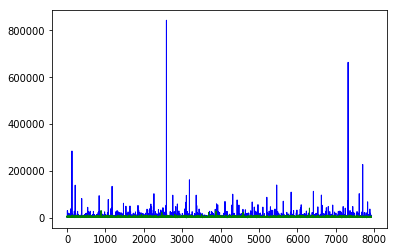

In [87]:
#plt.scatter(data_y_pred, data_y_pred, color='black')
plt.plot(range(0,len(data_y_test)), data_y_test, color='blue', linewidth=1)
plt.plot(range(0,len(data_y_pred)), data_y_pred, color='green', linewidth=1)